In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import polars as pl
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [16]:
df = pl.read_csv("truss_10-Load_2_4-height_2.5_17.5-length_2.5_17.5-young_50e9_250e9_D_H_V-area_0.0001_0.005_D_H_V-1000K.csv")

In [17]:
df = df.to_pandas()

In [23]:
X = df.drop(['u_x1', 'u_y1', 'u_x2', 'u_y2', 'u_x3', 'u_y3', 'u_x4', 'u_y4', 'u_x5',
       'u_y5', 'u_x6', 'u_y6', 'N_1', 'N_2', 'N_3', 'N_4', 'N_5', 'N_6', 'N_7',
       'N_8', 'N_9', 'N_10'], axis=1)

y = df[['u_x1', 'u_y1', 'u_x2', 'u_y2', 'u_x3', 'u_y3', 'u_x4', 'u_y4', 'u_x5',
       'u_y5', 'u_x6', 'u_y6', 'N_1', 'N_2', 'N_3', 'N_4', 'N_5', 'N_6', 'N_7',
       'N_8', 'N_9', 'N_10']]

# Initialize scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale X and y
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [26]:
# Initialize and train the MLPRegressor
mlp = MLPRegressor(random_state=42, hidden_layer_sizes=(50,50,50), max_iter=1000, learning_rate='constant', learning_rate_init=.1,verbose=1)
mlp.fit(X_train, y_train)
print("Model fitted")

Iteration 1, loss = 0.19685119
Iteration 2, loss = 0.19067815
Iteration 3, loss = 0.19134149
Iteration 4, loss = 0.19192676
Iteration 5, loss = 0.19182382
Iteration 6, loss = 0.19251521
Iteration 7, loss = 0.19194825
Iteration 8, loss = 0.19170186
Iteration 9, loss = 0.19167236
Iteration 10, loss = 0.19153207
Iteration 11, loss = 0.19291505
Iteration 12, loss = 0.19181128
Iteration 13, loss = 0.19262048
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Model fitted


In [28]:
# Predict and evaluate the model
y_pred_scaled = mlp.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_original, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 22350551720.33655


<Axes: ylabel='Frequency'>

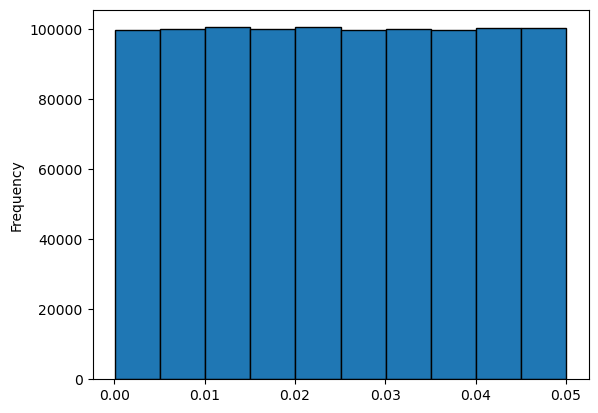

In [33]:
df['E_1'].plot(kind='hist', bins=10, edgecolor='black')